# MATH 210 Assignment 5

### Instructions

* There are 4 problems and 22 total points.
* Write your solutions in the cells below.
* You may work on these problems with others but you must write your solutions on your own.
* Use NumPy, SciPy and Matplotlib.
* Execute the test cells to verify that your solutions pass.
* This notebook does not contain all tests for grading (this means that your solution may not be completely correct even if it passes all tests below).
* Submit this notebook to Canvas before **11:59pm Friday November 30**.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import scipy.integrate as spi
%matplotlib inline

### Problem 1 (7 points)

Write a function called `is_adjacency` which takes an input parameter `A`, a 2D NumPy array, and returns `True` if $A$ is the adjacency matrix of simple, connected, undirected graph and `False` otherwise. In other words, the function should return `True` if all the following conditions are met:
* $A$ is square.
* $A$ is symmetric.
* All diagonal entries of $A$ are 0.
* All off-diagonal entries of $A$ are either 0 or 1. This implies that the graph associated with $A$ is simple and undirected.
* The multiplicity of the eigenvalue 0 in the Laplacian matrix $L$ associated with $A$ is 1. This implies that the graph associated with $A$ is connected.

There are several NumPy functions that may be helpful such as [`numpy.diag`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.diag.html), [`numpy.allclose`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.allclose.html?highlight=allclose#numpy.allclose) and [`numpy.unique`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.unique.html). Use any NumPy functions that you like.

The [Laplacian matrix](https://en.wikipedia.org/wiki/Laplacian_matrix) $L$ of a graph $G$ is defined as the matrix where the entry at index $(i,j)$ is -1 if node $i$ is connected to node $j$, 0 if not and $-d_i$ at the diagonal entry at index $(i,i)$ where $d_i$ is the degree of node $i$. The [degree](https://en.wikipedia.org/wiki/Degree_(graph_theory) of a node is the number of edges connected to that node. The degree of node $i$ is the sum of row $i$ in the adjacency matrix $A$. In other words, $L = D - A$ where $A$ is the adjacency matrix and $D$ is the [degree matrix](https://en.wikipedia.org/wiki/Degree_matrix).

For example, let $G$ be the following graph:

![graph](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/6n-graf.svg/440px-6n-graf.svg.png)

The adjacency matrix is

$$
A_G = \begin{bmatrix}
0 & 1 & 0 & 0 & 1 & 0 \\
1 & 0 & 1 & 0 & 1 & 0 \\
0 & 1 & 0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 & 1 & 1 \\
1 & 1 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0
\end{bmatrix}
$$

The degree matrix is

$$
D_G = \begin{bmatrix}
2 & 0 & 0 & 0 & 0 & 0 \\
0 & 3 & 0 & 0 & 0 & 0 \\
0 & 0 & 2 & 0 & 0 & 0 \\
0 & 0 & 0 & 3 & 0 & 0 \\
0 & 0 & 0 & 0 & 3 & 0 \\
0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix}
$$

Note the diagonal entires are the sum of the rows of $A_G$. The Laplacian matrix is:

$$
L_G = D_G - A_G = \left[ \begin{array}{rrrrrr}
2 & -1 & 0 & 0 & -1 & 0 \\
-1 & 3 & -1 & 0 & -1 & 0 \\
0 & -1 & 2 & -1 & 0 & 0 \\
0 & 0 & -1 & 3 & -1 & -1 \\
-1 & -1 & 0 & -1 & 3 & 0 \\
0 & 0 & 0 & -1 & 0 & 1
\end{array} \right]
$$

Finally the multiplicity of the eigenvalue 0 in $L_G$ is 1.

In [28]:
L = np.array([[2,-1,0,0,-1,0],
              [-1,3,-1,0,-1,0],
              [0,-1,2,-1,0,0],
              [0,0,-1,3,-1,-1],
              [-1,-1,0,-1,3,0],
              [0,0,0,-1,0,1]])

eigvals,eigvecs = la.eig(L)

print(np.round(eigvals.real,2))

[ 0.    0.72  1.68  3.    3.7   4.89]


In [47]:
import scipy.sparse.csgraph as cs
def is_adjacency(A):
     
    m = A[:,0].size
    n = A[0,:].size
    
    B = A.transpose()
    dA = np.diag(A)
    
    if m == n:
        
        if np.array_equal(A,B) == True:
            
            if np.array_equal(dA,np.zeros(n)) == True:
                
                for j in range(0,n):
                    for i in range(0,n):
                        
                        if A[i,j] == 0 or 1:
                            
                            L = cs.laplacian(A)
                            eigvals,eigvecs = la.eig(L)
                            n = eigvals.size
                            
                            for p in range(1,n):
                                
                                if eigvals[0] == eigvals[p]:
                                    
                                    return False
                            
                            return True
    else:
         return False

In [48]:
"Check that is_adjacency returns the correct type."
A = np.array([[0,1],[1,0]])
assert type(is_adjacency(A)) == bool , "Return value should be boolean."
print("Problem 1 Test 1: Success!")

Problem 1 Test 1: Success!


In [49]:
"Check that is_adjacency returns False when A is not square."
A = np.arange(0,21).reshape(3,7)
assert not is_adjacency(A) , "Return value should be False."
print("Problem 1 Test 2: Success!")

Problem 1 Test 2: Success!


In [50]:
"Check that is_adjacency returns False when A is not symmetric."
A = np.arange(0,25).reshape(5,5)
assert not is_adjacency(A) , "Return value should be False."
print("Problem 1 Test 3: Success!")

Problem 1 Test 3: Success!


In [51]:
"Check that is_adjacency returns False when A has non-zero diagonal entries."
M = np.arange(0,16).reshape(4,4)
A = M + M.T
assert not is_adjacency(A) , "Return value should be False."
print("Problem 1 Test 4: Success!")

Problem 1 Test 4: Success!


In [52]:
"Check that is_adjacency returns False when A has entries not equal to 0 or 1."
M = np.arange(0,16).reshape(4,4)
B = M + M.T
A = B - np.diag(np.diag(B))
assert not is_adjacency(A) , "Return value should be False."
print("Problem 1 Test 5: Success!")

AssertionError: Return value should be False.

In [53]:
"Check that is_adjacency returns False when A has Laplacian with eigenvalue 0 with multiplicity bigger than 1."
A = np.array([[0,1,0,0],[1,0,0,0],[0,0,0,1],[0,0,1,0]])
assert not is_adjacency(A) , "Return value should be False."
print("Problem 1 Test 6: Success!")

Problem 1 Test 6: Success!


In [54]:
"Check that is_adjacency returns True when A is the adjacency matrix."
A = np.array([[0,1,0,1],[1,0,0,0],[0,0,0,1],[1,0,1,0]])
assert is_adjacency(A) , "Return value should be True."
print("Problem 1 Test 7: Success!")

Problem 1 Test 7: Success!


### Problem 2 (5 points)

Let $A$ be the adjacency matrix of a simple, connected, undirected graph $G$. [The number of walks of length $k$ from node $i$ to node $j$](https://en.wikipedia.org/wiki/Adjacency_matrix#Matrix_powers) is the entry at index $(i,j)$ of the matrix $A^k$.

Write a function called `shortest_walk` which takes input parameters `A`, `i` and `j` and returns the length of the shortest walk connecting node $i$ and node $j$ in the graph with adjacency matrix $A$. In other words, return the smallest value $k$ such that the entry at index $(i,j)$ of $A^k$ is non-zero.

The function should print a warning message and return 0 if $A$ is not an adjacency matrix of a simple, undirected graph. (Use the function from Problem 1.)

In [55]:
from numpy.linalg import matrix_power as mpow
def shortest_walk(A,i,j):
    
    if is_adjacency(A) == True:
        
        k = 1
        Ak = mpow(A,k)
        
        while Ak[i,j] == 0:
        
            Ak = mpow(A,k+1)
            k = k+1
        
        return k
    
    else:
        
        print("Matrix A is not an adjacency matrix")
        return 0
    

In [56]:
"Check that shortest_walk returns the correct values for the simplest cases."
A = np.array([[0,1],[1,0]])
assert shortest_walk(A,0,1) == 1 , "Return value should be 1 in this case."
assert shortest_walk(A,1,1) == 2 , "Return value should be 2 in this case."
print("Problem 2 Test 1: Success!")

Problem 2 Test 1: Success!


In [57]:
"Check that shortest_walk returns 0 when A is not an adjacency matrix of a simple, connected, undirected graph."
A = np.array([[1,1],[1,0]])
assert shortest_walk(A,0,1) == 0 , "Return value should be 0 in this case."
print("Problem 2 Test 2: Success!")

Matrix A is not an adjacency matrix
Problem 2 Test 2: Success!


In [58]:
"Check that shortest_walk returns the correct values."
A = np.array([[0,1,0,0,1,0],
              [1,0,1,0,1,0],
              [0,1,0,1,0,0],
              [0,0,1,0,1,1],
              [1,1,0,1,0,0],
              [0,0,0,1,0,0]])

assert shortest_walk(A,4,5) == 2 , "Return value should be 2 in this case."
assert shortest_walk(A,0,5) == 3 , "Return value should be 3 in this case."

print("Problem 2 Test 3: Success!")

Problem 2 Test 3: Success!


##  Problem 3 (5 points)

Write a function called `trig_euler` which takes input parameters `alpha`, `beta`, `y0`, `tf` and `N` (with default values `y0=0`, `tf=10` and `N=100`) and implements Euler's method with step size $h = \frac{t_f}{N-1}$ to approximate the solution of the equation

$$
y' = \sin(\alpha y) + \cos(\beta t) \ , \ y(0) = y_0
$$

over the interval $[0,t_f]$. The function plots the approximation $y$ versus $t$ and returns a 2D NumPy array `Y` of size $N$ by 2 where the column at index 0 is the array of $t$ values from 0 to $t_f$, and the column at index 1 is the array of corresponding $y$ values given by Euler's method.

In [101]:
def trig_euler(alpha, beta, y0 = 0, tf = 10, N = 100):
    
    h = tf/(N-1)
    t = np.linspace(0,tf,N)
    
    y = np.zeros(len(t))
    y[0] = y0
    
    def f(y,t):
        
        return np.sin(alpha*y) + np.cos(beta*t)
    
    for i in range(0,len(t)-1):
        
        y[i+1] = y[i] + f(y[i],t[i])*h
    
    plt.plot(t,y)
    
    return np.column_stack((t,y))

Problem 3 Test 1: Success!


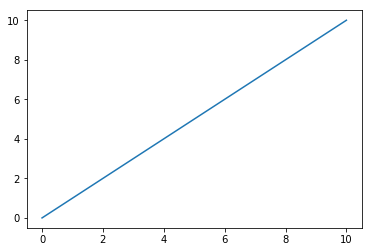

In [102]:
"Check that trig_ode returns an array of correct size."
assert np.allclose(trig_euler(1,1,N=2).shape,[2,2]), "Return type should be a NumPy array of size 2 by 2 in this case."
print("Problem 3 Test 1: Success!")

Problem 3 Test 2: Success!


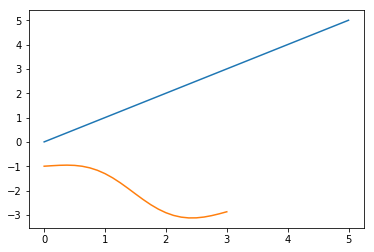

In [103]:
"Check that trig_ode returns the correct values."
assert np.allclose(trig_euler(3,4,tf=5,N=2),np.array([[0,0],[5,5]])), "Return values should be y=5 at t=5 in this case."

Y = np.array([[ 0.        , -1.        ],
              [ 0.125     , -0.98018387],
              [ 0.25      , -0.96289479],
              [ 0.375     , -0.95580302],
              [ 0.5       , -0.96643907]])

assert np.allclose(trig_euler(1,2,y0=-1,N=25,tf=3)[:5,:],Y)

print("Problem 3 Test 2: Success!")

##  Problem 4 (5 points)

Write a function called `coriolis` which takes input parameters `w`, `Omega`, `phi`, `u0` and `t`. The function uses `scipy.integrate.odeint` to numerically solve the system of equations

\begin{align*}
\frac{d^2 x}{dt^2} &= -\omega^2 x + 2 \Omega \sin(\phi) \frac{dy}{dt} \\
\frac{d^2 y}{dt^2} &= -\omega^2 y - 2 \Omega \sin(\phi) \frac{dx}{dt}
\end{align*}

given the initial conditions $[x(t_0),x'(t_0),y(t_0),y'(t_0)]$ defined by `u0` (a Python list of length 4), and where $t$ is a 1D NumPy array of $t$ values over an interval $[t_0,t_f]$. The parameters $\omega$, $\Omega$, and $\phi$ are given by `w`, `Omega`, and `phi` respectively. The function plots the trajectory $(x(t),y(t))$ of the solution and returns a 2D NumPy array $M$ of size `len(t)` by 3 where the column at index 0 is the array of $t$ values, the column at index 1 is the corresponding array of $x$ values and the column at index 2 is the corresponding array of $y$ values.

In [112]:
def coriolis(w, Omega, phi, u0, t):
    
    def solver(u,t):
        dudt = np.zeros(4)
        dudt[0] = u[1]
        dudt[2] = u[3]
        dudt[1] = -(w**2)*u[0] + 2*Omega*np.sin(phi)*u[3]
        dudt[3] = -(w**2)*u[2] - 2*Omega*np.sin(phi)*u[1]
        
        return dudt
    
    u = spi.odeint(solver,u0,t)
    plt.plot(u[:,0],u[:,2])
    return np.column_stack((t,u[:,0],u[:,2]))
    

Problem 5 Test 1: Success!


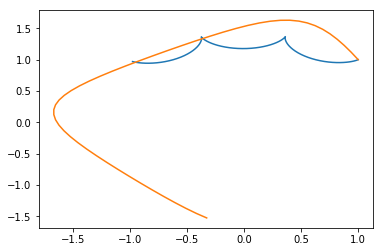

In [113]:
"Check that coriolis returns an array of the correct size."
assert np.allclose(coriolis(1,3,np.pi/6,[1,0,1,0],np.linspace(0,5,100)).shape, [100,3])
assert np.allclose(coriolis(2,1,np.pi/2,[1,-1,1,2],np.linspace(0,3,50)).shape, [50,3])
print("Problem 5 Test 1: Success!")

Problem 5 Test 2: Success!


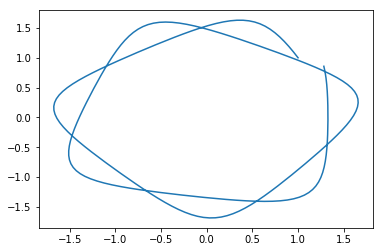

In [114]:
"Check that coriolis returns the correct values."
solution = coriolis(2,1,np.pi/2,[1,-1,1,2],np.linspace(0,10,200))
M = np.array([[ 0.        ,  1.        ,  1.        ],
              [ 0.05025126,  0.94974454,  1.09781044],
              [ 0.10050251,  0.89943111,  1.18959012],
              [ 0.15075377,  0.84891533,  1.2744251 ]])
assert np.allclose(solution[:4,:],M)
print("Problem 5 Test 2: Success!")